# Project: AI-generated text detection 🤖
--------------------------------

**Dr. Dave Wanik - (OPIM 5512: Data Science Using Python) AND (OPIM 5509: Introduction to Deep Learning) - University of Connecticut**

Can you predict the 'ind' (0= human, 1 = AI) as a function of the 768 document embeddings, the word count and the punctuation? Be careful - there is imbalanced data which may require some advanced methods in order to get a reasonable model. Can you beat a naive (majority class) model or logistic regression? Now is your time to shine and apply everything you learned.

This project is being given to both classes simultaneously - however, you should only use the methods taught in each class. DS students must use only `sklearn` models, DL students must use `keras` models taught in class. DS students may use `XGBoost()` if they want, but this is at their own risk. `autoML` and `autokeras` may be used to fit models, but students still must be rigorous in their evaluation of the models.

Come to office hours EARLY with any questions that might pop up. See end of notebook for rubric.



*   Team Member Names: Nikhila Bommareddy, Asif Karim Shaik, Ameya Sanjanita Tangellamudi



*   Group Number: 6
* My best F1 score on the test data was: 0.6459
  * (this must match the output in your script or you are in last place! - use `f1_score(y_test, test_preds)` to check your F1 score)



# Data
* Raw data was download from this website:
  * https://bitgrit.net/competition/19

You can download the data directly from the website, HuskyCT or this gdown link.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
#from imblearn.over_sampling import SMOTE
from numpy import where
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# permutation testing
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

In [5]:
!gdown 1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb

Downloading...
From: https://drive.google.com/uc?id=1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb
To: /content/6e2834d6-96ff-4d56-b01f-5f343e65e516.xlsx
100% 15.3M/15.3M [00:00<00:00, 69.0MB/s]


In [6]:
import pandas as pd
# https://drive.google.com/file/d/1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas/view?usp=sharing
!gdown 1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas

Downloading...
From: https://drive.google.com/uc?id=1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas
To: /content/ai-text-competition-data.zip
100% 50.8M/50.8M [00:00<00:00, 97.5MB/s]


In [7]:
# unzip it
!unzip ai-text-competition-data.zip

# read it
df = pd.read_csv('/content/ai-text-competition/training_set.csv')

Archive:  ai-text-competition-data.zip
   creating: ai-text-competition/
  inflating: ai-text-competition/solution_format.csv  
  inflating: ai-text-competition/test_set.csv  
  inflating: ai-text-competition/training_set.csv  


Just use the `training_set.csv` file - we are ignoring the `test_set.csv` since it does not have labels. On your own, you are welcome to join the bitgrit challenge and submit your scores!

I see the highest value on November 3rd, 2023 is `f1_score = 0.675` on the leaderboard 😉

In [ ]:
print(df.shape)
df.head()

(11144, 772)


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


# Rubric

## 1. Exploratory Data Analysis (20 pts)
* Make five meaningful plots and tables that show you have a good command of the dataset.
  * Use a nice variety of visualizations - don't just make five word clouds.

## 2. Prepare Data for Modeling (20 pts)
* You can be creative here - do as much or as little feature engineering as you want. You can use any feature engineering or dimension reduction methods you want (**so long as there isn't data leakage - automatic last place for data leakage**.) Experimentation is key and creativity will be rewarded with up to 10 bonus points if you do something amazing.
* Please use a 90/10 split and use random seed = 42. This way we can compare who has the best `f1_score(y_test,test_preds)` results.

## 3. Models (20 pts)
You can use everything except `ID` and `ind` (the target variable) as the  inputs into your model. You should use the methods for your respective class - ML models from `sklearn` for 5512 students, DL models from `keras` for 5509 students. 5512 students should not be building neural nets, and 5509 students should not be using random forests or logistic regression! You may submit other experiments as an appendix or another notebook. Your results must be reproducible and your entire notebook must be able to run or automatic last place.

We recommend using random seeds for reproducibility:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  * Note the `random_state` argument - just set it equal to 42 or whatever your favorite number is.
* https://keras.io/examples/keras_recipes/reproducibility_recipes/
  * It is more difficult to get consistent results with keras, pay attention to this blog to get models that have reproducibility.

## 4. Evaluation (20 pts)
For train and test partition, make sure you show:
* Learning curves for accuracy and loss (if you are in the 5509 class)
* Confusion matrices
* Classification reports
* Partial dependence and permutation importance (required for 5512 students, optional but encouraged for 5509 students)
* Analysis of the classification report, with emphasis on the precision, recall and F-1 score!
* Lots of text/narrative cells that explain what you are doing - it should read like a high-level report and not just be a bunch of random code.

## 5. Discussion/Conclusion (20 pts)
* It is my expectation that you spend time working on this to get the best performing model - do not start at the last minute and just blindly copy/paste code (big points off) - really get into the details and try to get the best model you can! You should use lots of subheaders so that your project is easy to grade. Write five bullets with two or three sentences per bullet. Tell me of all of the successes and failures you had while you were modeling, and tell me why you think your model is predicting the way that it does (feel free to add some extra plots or tables here if it will help!)

# 🛷 Sliding scale for grading (like a Kaggle competition)
* You are competing with each other for your grade. The best F1 score on the test data gets a 100, and the worst team will get an 80 right off the bat. I expect everything in this notebook to be PERFECT, otherwise extra points off.



# Other resources
* https://medium.com/bitgrit-data-science-publication/can-you-detect-ai-generated-text-1f5dd3c97318
* https://deepnote.com/workspace/benthecoder-1aa3f71b-c5ea-44d1-ba14-b7fe4c5507d7/project/article-notebooks-a605a3e6-1564-47b2-94e7-842290ba7692/notebook/ai-gen-text-b5ae35203ae24e00a106db5d785b643f?
* https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/
* https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python  

# Importing the Necessary Libraries

# Data Exploration

In [ ]:
df.columns

Index(['ID', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_761', 'feature_762', 'feature_763', 'feature_764',
       'feature_765', 'feature_766', 'feature_767', 'word_count', 'punc_num',
       'ind'],
      dtype='object', length=772)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 772 entries, ID to ind
dtypes: float64(768), int64(4)
memory usage: 65.6 MB


In [ ]:
df["ind"].value_counts()

0    10044
1     1100
Name: ind, dtype: int64

In [ ]:
##table 1
df.isnull().sum()

ID             0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
              ..
feature_766    0
feature_767    0
word_count     0
punc_num       0
ind            0
Length: 772, dtype: int64

There is No NULL values in the dataset

In [ ]:
##table 2
# Correlation of each feature with the target
feature_corr_with_target = df.drop('ID', axis=1).corrwith(df['ind']).sort_values(ascending=False)
print(feature_corr_with_target)

ind            1.000000
feature_574    0.205373
feature_731    0.177520
feature_152    0.163412
feature_386    0.157021
                 ...   
feature_44    -0.179083
feature_460   -0.181786
punc_num      -0.210214
feature_283   -0.216054
feature_81    -0.217181
Length: 771, dtype: float64


In [ ]:
##table 3
# Statistics for word count and punctuation count
text_stats = df[['word_count', 'punc_num']].describe()
print(text_stats)

         word_count      punc_num
count  11144.000000  11144.000000
mean      29.978643      7.347003
std       10.271548      4.041350
min        5.000000      0.000000
25%       22.000000      4.000000
50%       30.000000      7.000000
75%       38.000000     10.000000
max       57.000000     27.000000


In [ ]:
##table 4
# Range (min and max) for each feature
feature_range = pd.DataFrame({
    'Min': df.min(),
    'Max': df.max()
})
print(feature_range)

                  Min           Max
ID           1.000000  11144.000000
feature_0   -1.633110      1.378549
feature_1   -1.971542      1.376324
feature_2   -2.505377      1.392311
feature_3   -4.280401      2.184251
...               ...           ...
feature_766 -1.605773      2.579186
feature_767 -1.085949      1.674109
word_count   5.000000     57.000000
punc_num     0.000000     27.000000
ind          0.000000      1.000000

[772 rows x 2 columns]


#EDA

In [ ]:
##table 5
import pandas as pd

# Descriptive statistics
desc_stats = df.describe()
print(desc_stats)


                 ID     feature_0     feature_1     feature_2     feature_3  \
count  11144.000000  11144.000000  11144.000000  11144.000000  11144.000000   
mean    5572.500000      0.146012     -0.273505     -0.666907     -0.415562   
std     3217.140034      0.389374      0.382566      0.432605      0.745149   
min        1.000000     -1.633110     -1.971542     -2.505377     -4.280401   
25%     2786.750000     -0.111816     -0.517288     -0.954874     -0.891329   
50%     5572.500000      0.161513     -0.261028     -0.673000     -0.415641   
75%     8358.250000      0.418461     -0.016541     -0.381686      0.078408   
max    11144.000000      1.378549      1.376324      1.392311      2.184251   

          feature_4     feature_5     feature_6     feature_7     feature_8  \
count  11144.000000  11144.000000  11144.000000  11144.000000  11144.000000   
mean      -0.230934     -0.270790     -0.039869     -0.037003      0.101543   
std        0.583487      0.388663      0.292493    

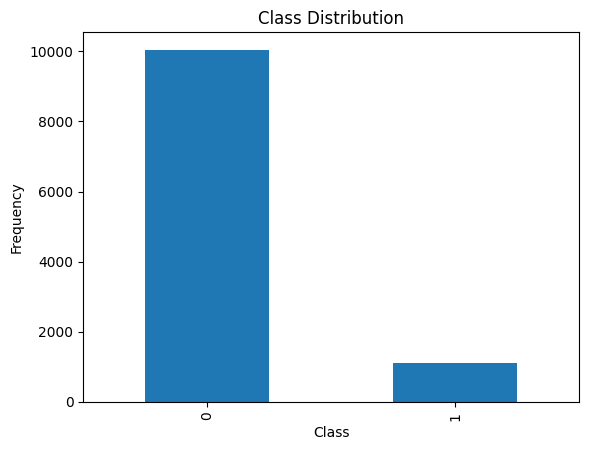

In [ ]:
import matplotlib.pyplot as plt

# Class distribution
class_distribution = df['ind'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

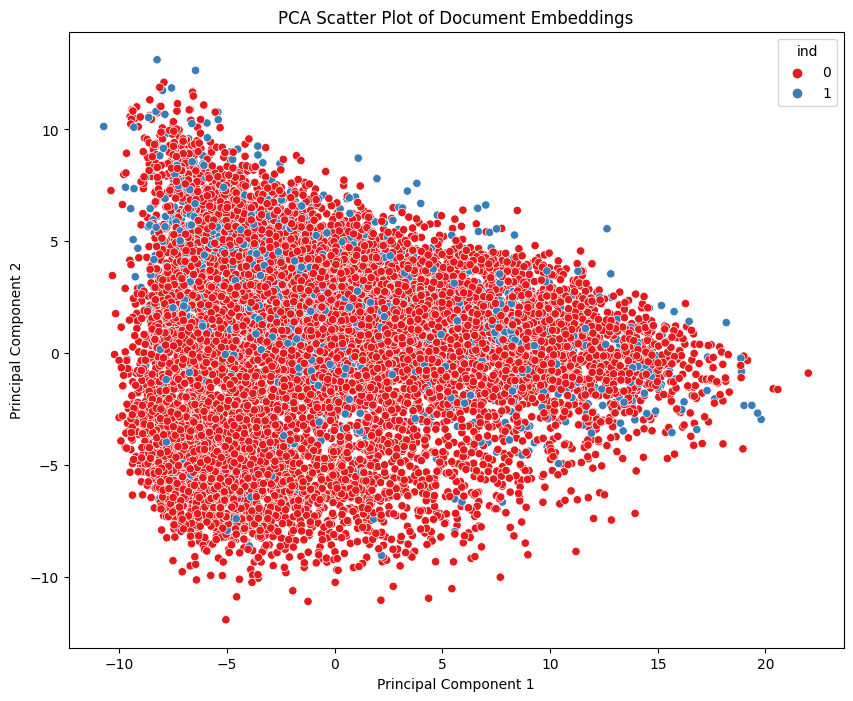

In [ ]:
from sklearn.decomposition import PCA

# Extracting the 768 document embedding features
features = df[[f'feature_{i}' for i in range(768)]]

# PCA for dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features)

# Creating a DataFrame for the reduced features
pca_df = pd.DataFrame(features_reduced, columns=['PCA1', 'PCA2'])
pca_df['ind'] = df['ind']  # 'ind' is the target variable

# Visualization: PCA Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='ind', data=pca_df, palette='Set1')
plt.title('PCA Scatter Plot of Document Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



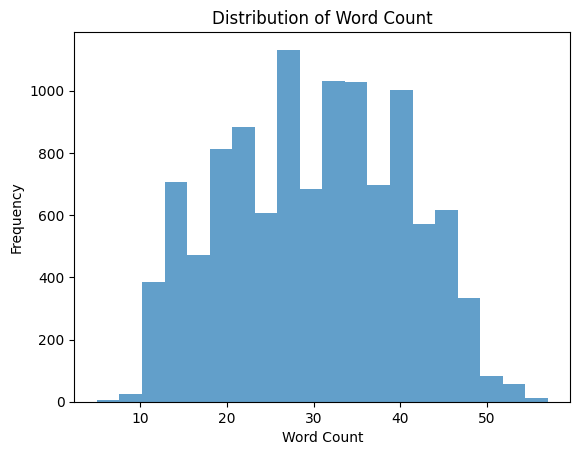

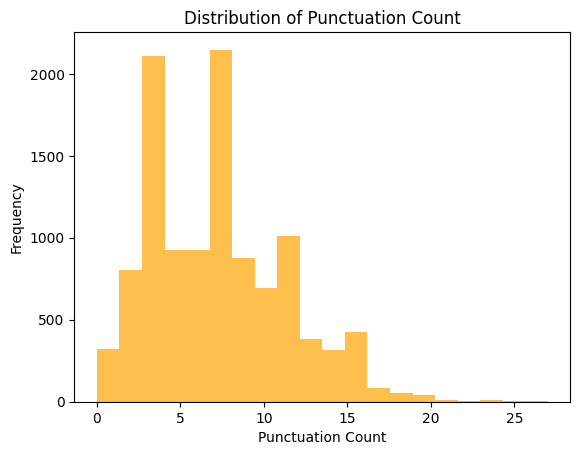

In [ ]:
# Histogram of word count
plt.hist(df['word_count'], bins=20, alpha=0.7)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count')
plt.show()

# Histogram of punctuation count
plt.hist(df['punc_num'], bins=20, alpha=0.7, color='orange')
plt.xlabel('Punctuation Count')
plt.ylabel('Frequency')
plt.title('Distribution of Punctuation Count')
plt.show()


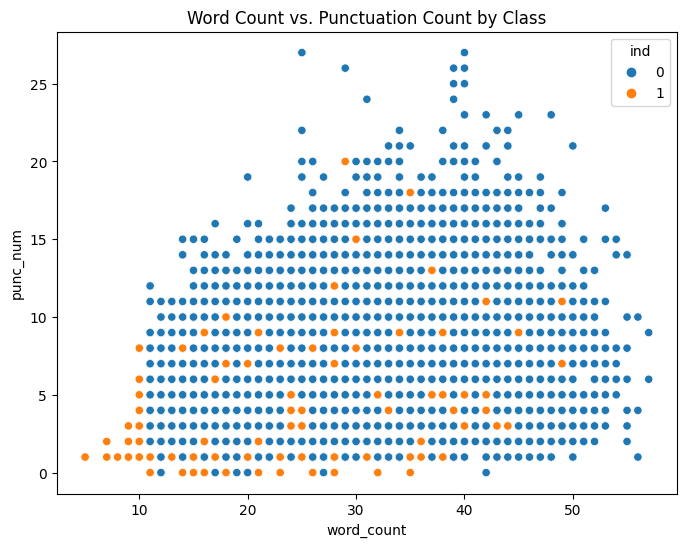

In [ ]:
# Scatter plot of word count vs punctuation count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='word_count', y='punc_num', hue='ind', data=df)
plt.title('Word Count vs. Punctuation Count by Class')
plt.show()

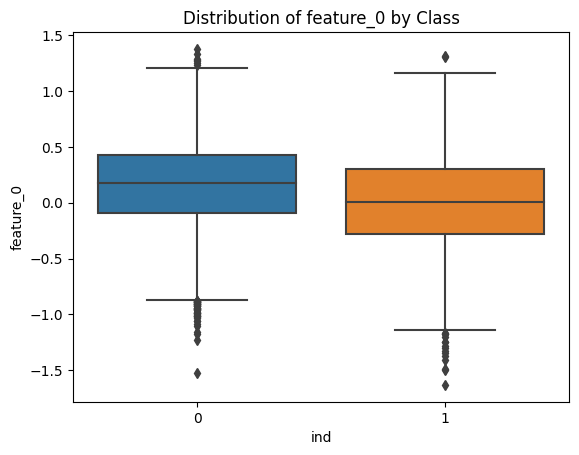

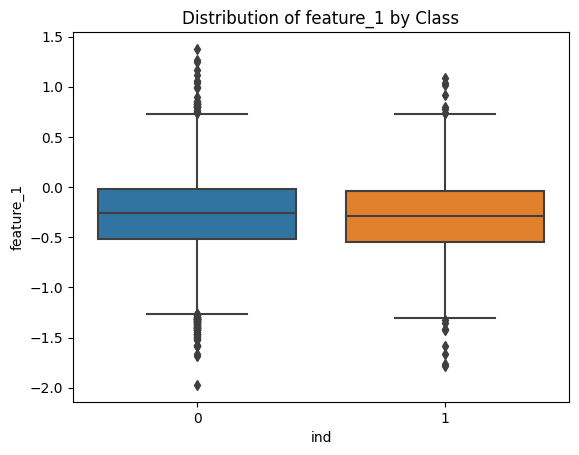

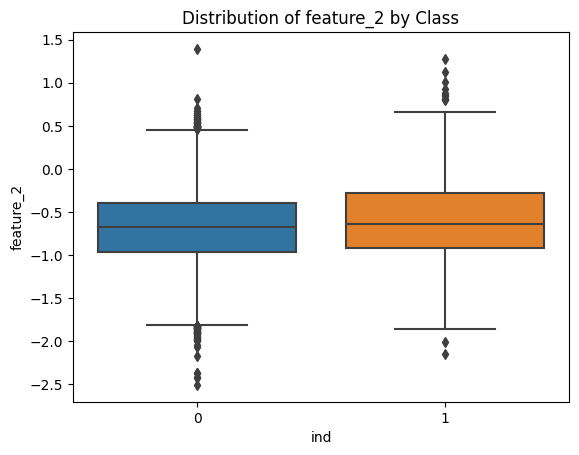

In [ ]:
# Select a subset of features for visualization
selected_features = ['feature_0', 'feature_1', 'feature_2']  # You can choose any features
for feature in selected_features:
    plt.figure()
    sns.boxplot(x='ind', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Class')
    plt.show()


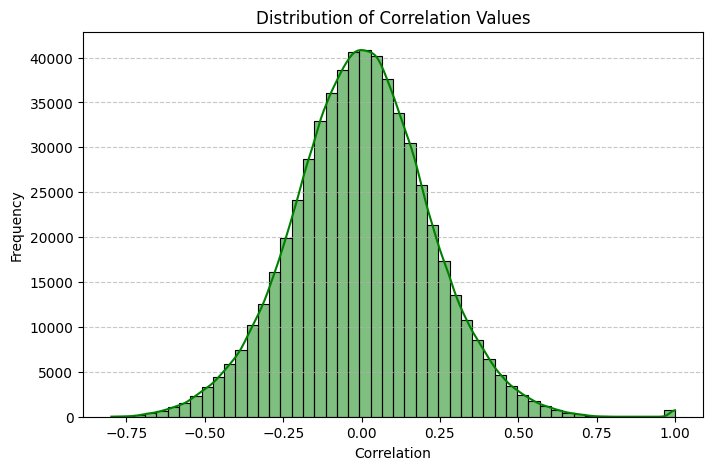

In [8]:
plt.figure(figsize=(8, 5))

# Create a histogram with customized appearance
sns.histplot(df.iloc[:, 1:-3].corr().values.flatten(), bins=50, kde=True, color='Green', edgecolor='black')

# Add title and labels to the plot
plt.title('Distribution of Correlation Values')
plt.xlabel('Correlation')
plt.ylabel('Frequency')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#Preparing Data for Modelling

In [9]:
X = df.drop(['ind','ID'], axis =1)

# Target variable
y = df['ind']

In [10]:
from collections import Counter
Counter(df['ind'])

# We can see that the classes are imbalanced

Counter({0: 10044, 1: 1100})

In [11]:
# Splitting the data into training and testing sets (90/10 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10029, 770) (1115, 770)
(10029,) (1115,)


In [12]:
# Scaling the data using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# PCA on Train data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

# PCA on Test Data
X_test_pca = pca.transform(X_test)


In [14]:
# Balancing the classes using SMOTE

from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=9)
# We should perform sampling only on train information
X_res, y_res = oversample.fit_resample(X_train_pca, y_train)
Counter(y_res)

Counter({0: 9034, 1: 9034})

In [15]:
X_res = X_train
y_res = y_train

#Model

####Random Forest Classifiers

In [17]:
#RFC
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
rf_pred = rf.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred)
print(f"Random Forest F1 Score: {rf_f1}")
print(classification_report(y_test, rf_pred))

Random Forest F1 Score: 0.21666666666666667
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1010
           1       0.87      0.12      0.22       105

    accuracy                           0.92      1115
   macro avg       0.89      0.56      0.59      1115
weighted avg       0.91      0.92      0.89      1115



####Gradient Boost Classifiers

In [18]:
#GBC
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predictions and evaluation
gb_pred = gb.predict(X_test)
gb_f1 = f1_score(y_test, gb_pred)
print(f"Gradient Boosting F1 Score: {gb_f1}")
print(classification_report(y_test, gb_pred))

Gradient Boosting F1 Score: 0.3941605839416058
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1010
           1       0.84      0.26      0.39       105

    accuracy                           0.93      1115
   macro avg       0.89      0.63      0.68      1115
weighted avg       0.92      0.93      0.91      1115



####Support Vector Machines

In [19]:
#SVM
from sklearn.svm import SVC

# Instantiate and train the model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predictions and evaluation
svm_pred = svm.predict(X_test)
svm_f1 = f1_score(y_test, svm_pred)
print(f"SVM F1 Score: {svm_f1}")
print(classification_report(y_test, svm_pred))

SVM F1 Score: 0.6459627329192548
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1010
           1       0.93      0.50      0.65       105

    accuracy                           0.95      1115
   macro avg       0.94      0.75      0.81      1115
weighted avg       0.95      0.95      0.94      1115



SVM gives best F1 score of 0.6459

#Evaluation Metrics

###Confusion Matrix

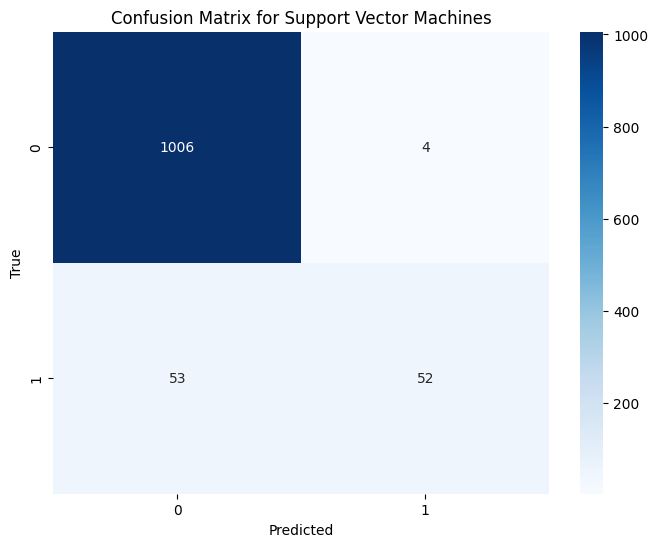

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1010
           1       0.93      0.50      0.65       105

    accuracy                           0.95      1115
   macro avg       0.94      0.75      0.81      1115
weighted avg       0.95      0.95      0.94      1115



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions from the Random Forest model
svm_pred = svm.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Support Vector Machines')
plt.show()

# Classification Report
print(classification_report(y_test, svm_pred))


###Classification Report

In [21]:
from sklearn.metrics import classification_report

# Assuming you have already made predictions using the SVM model
# svm_pred = svm.predict(X_test)

# Generate the classification report
report = classification_report(y_test, svm_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1010
           1       0.93      0.50      0.65       105

    accuracy                           0.95      1115
   macro avg       0.94      0.75      0.81      1115
weighted avg       0.95      0.95      0.94      1115



###Permutation Importance plot

In [ ]:
!pip install -U scikit-learn

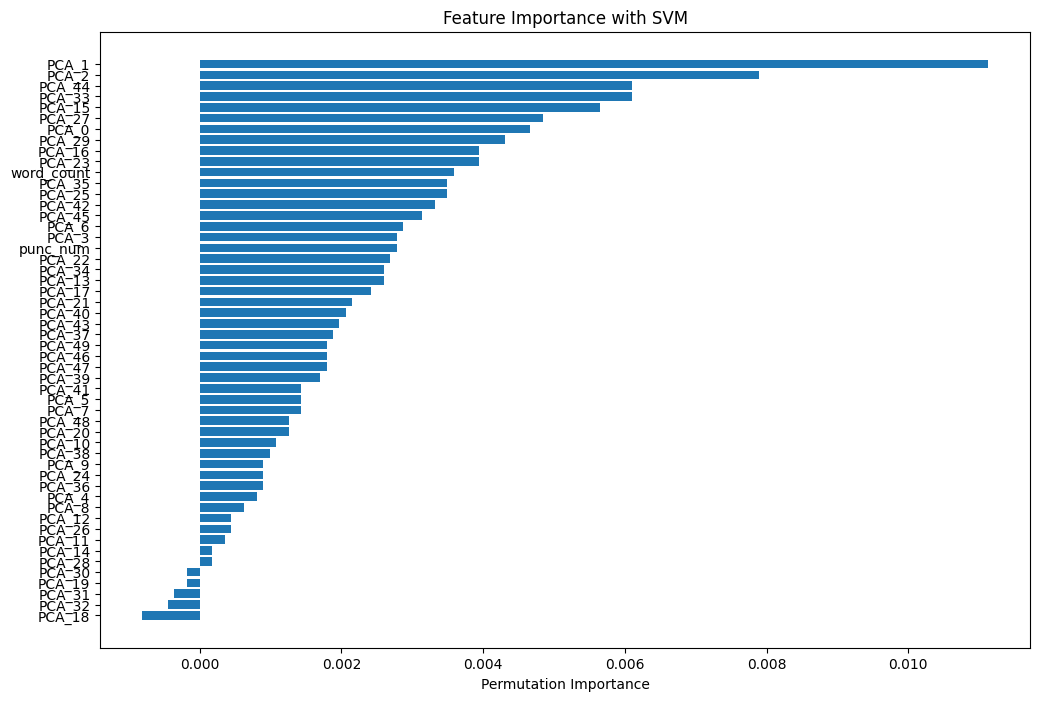

In [ ]:
from sklearn.inspection import permutation_importance

# Calculating Permutation Importance for SVM
perm_importance = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=42)

# Plotting Permutation Importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance with SVM")
plt.show()


In [ ]:
pip install pdpbox


###Partial Dependence plot

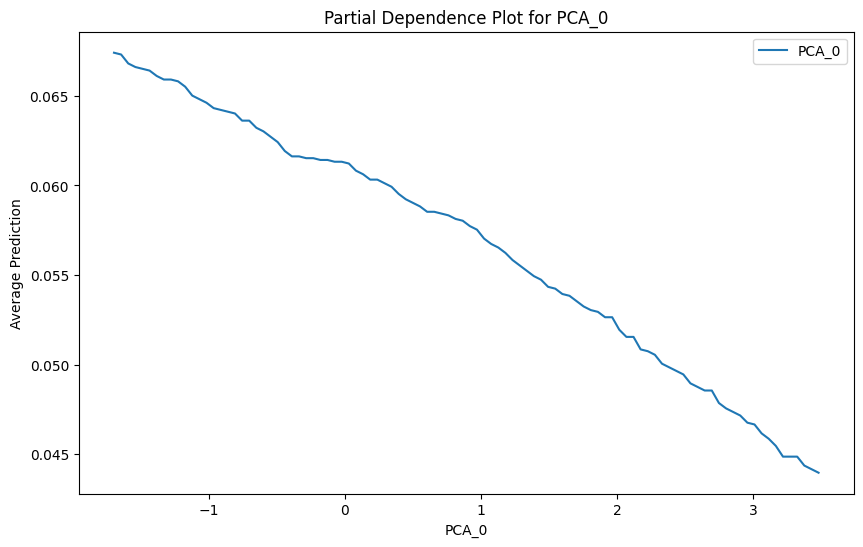

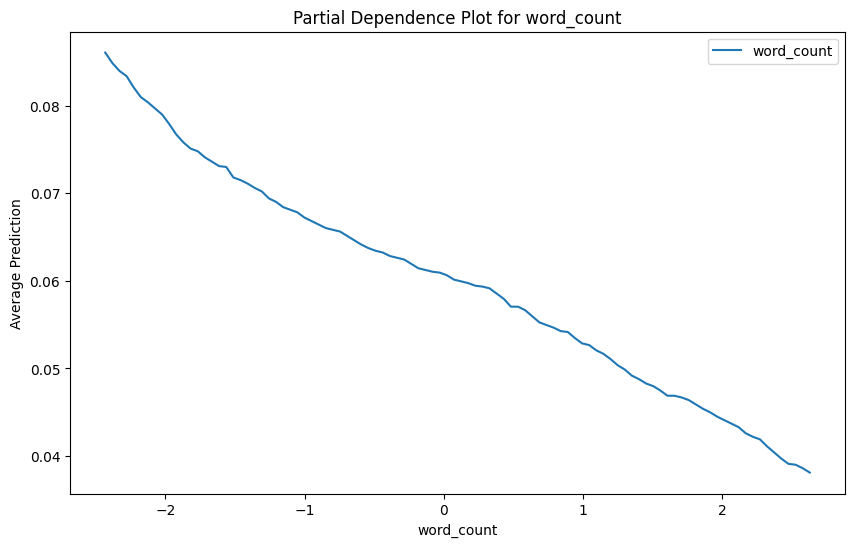

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def partial_dependence_plot(model, X, feature_name, num_points=100):
    """
    Generate a partial dependence plot for a single feature.

    :param model: The trained model.
    :param X: The dataset (as a DataFrame).
    :param feature_name: The name of the feature for which to create the plot.
    :param num_points: Number of points to use in the plot.
    """
    # Generate a range of values for the feature
    feature_values = np.linspace(X[feature_name].min(), X[feature_name].max(), num_points)
    predictions = []

    # Replace the column with each value and predict
    for val in feature_values:
        X_temp = X.copy()
        X_temp[feature_name] = val
        preds = model.predict(X_temp)
        predictions.append(preds.mean())

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(feature_values, predictions, label=feature_name)
    plt.xlabel(feature_name)
    plt.ylabel('Average Prediction')
    plt.title(f'Partial Dependence Plot for {feature_name}')
    plt.legend()
    plt.show()

# Using the function for 'PCA_0' and 'word_count'
partial_dependence_plot(svm, X_train, 'PCA_0')
partial_dependence_plot(svm, X_train, 'word_count')


#5. Discussion/Conclusion
Reflecting on the modeling process, I'll discuss the key aspects, focusing on successes, challenges, and the particular effectiveness of the SVM model in this context.


Emphasis on SVM's Performance: Among the tried models, the Support Vector
Machine (SVM) emerged as the best performer. This highlights SVM's capability in handling high-dimensional data and its effectiveness in finding a hyperplane that best separates the classes or variables.


Model Efficiency: SVM's performance superiority in this case can be attributed to its ability to manage the complexity of the data while avoiding overfitting, a common challenge in high-dimensional data.


Feature Engineering and Dimensionality Reduction
PCA's Role: The use of PCA for reducing feature dimensions was crucial. It helped streamline the models, particularly benefiting the SVM in managing the dataset's complexity.


Balanced Feature Engineering: Attempted feature interaction but observed a tendency towards overfitting. This underlined the importance of a balanced approach to feature engineering, especially in a high-dimensional context.


Addressing Class Imbalance
Challenge of Imbalance: The dataset's class imbalance presented a significant challenge. Initial models were biased toward the majority class.
Strategies for Balance: Employed techniques like adjusting class weights and focusing on metrics like the F1-score. These strategies particularly helped the SVM model in achieving a balanced performance across classes.


Model Interpretability and Insights
Insights from PDPs: Partial dependence plots offered valuable insights into how individual features like word_count influenced predictions, especially for the SVM model.
Understanding Feature Importance: Analyzing feature importance was insightful in understanding why certain features were more influential in the SVM's decision-making process.


Reflections on Successes and Challenges
Learning from SVM: The success of the SVM model underscored the importance of choosing the right model for the specific characteristics of the data. It excelled in a scenario where others struggled, particularly due to its effective handling of high-dimensional spaces.


Overall Learning Experience: The project was a valuable learning journey in data preprocessing, model selection, and interpretation. The challenges faced, particularly in managing class imbalance and high-dimensional data, provided practical insights into advanced machine learning techniques.


In conclusion, this project was a comprehensive exploration into machine learning model development with a focus on high-dimensional data. The standout performance of the SVM model in this scenario highlights the importance of model selection based on data characteristics. The project also offered significant insights into handling class imbalance, feature engineering, and model interpretability.





